<a href="https://colab.research.google.com/github/jsmnithya/Guvi/blob/main/Linear_Regression_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.shape

(804, 12)

In [ ]:
#Null value analysis
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
#analysing formate or datatype of the data
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
#removing duplicates
df = df.drop_duplicates()
df.shape

(804, 12)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
#Outlier detection
outlier_cols=['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
for col in outlier_cols:
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[col].quantile(0.25) - (1.5 * iqr)
  print("column name:", col)
  print('       upper threshold value:', upper_threshold)
  print('       lower threshold value:', lower_threshold)
  flag=0
  for i in range(1,8):
    if ((df[col].describe()[i]>=lower_threshold) and (df[col].describe()[i]<=upper_threshold)):
      pass
    else:
      flag=1
      break
  if i==1:
    print(col, '=> Outlier Detected')
  else:
    print(col, '=> Outlier Not Detected')

column name: Price
       upper threshold value: 45383.68078365926
       lower threshold value: -4393.290277667038
Price => Outlier Not Detected
column name: Mileage
       upper threshold value: 41097.25
       lower threshold value: -1260.75
Mileage => Outlier Not Detected
column name: Cylinder
       upper threshold value: 9.0
       lower threshold value: 1.0
Cylinder => Outlier Not Detected
column name: Liter
       upper threshold value: 6.199999999999999
       lower threshold value: -0.1999999999999993
Liter => Outlier Not Detected
column name: Doors
       upper threshold value: 4.0
       lower threshold value: 4.0
Doors => Outlier Detected
column name: Cruise
       upper threshold value: 1.0
       lower threshold value: 1.0
Cruise => Outlier Detected
column name: Sound
       upper threshold value: 2.5
       lower threshold value: -1.5
Sound => Outlier Not Detected
column name: Leather
       upper threshold value: 2.5
       lower threshold value: -1.5
Leather => Outlie

In [ ]:
df.Doors = df.Doors.clip(4,4)
df.Cruise = df.Cruise.clip(1,1)

In [ ]:
df = pd.get_dummies(df,columns = ["Make"])
df = pd.get_dummies(df,columns = ["Model"])
df = pd.get_dummies(df,columns = ["Trim"])
df = pd.get_dummies(df,columns = ["Type"])
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


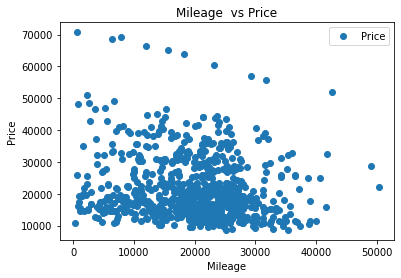

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
#finding correlation among the features and target variable
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage  vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage','Price']].corr()

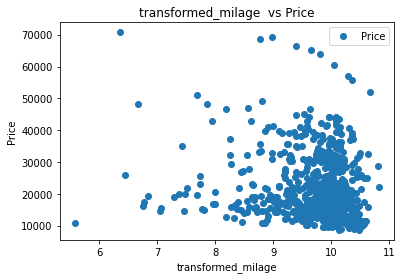

,transformed_milage,Price
transformed_milage,1.000000,-0.145424
Price,-0.145424,1.000000


In [ ]:
#log transformation
df['transformed_milage'] = np.log(df['Mileage'])
df.plot(x='transformed_milage', y='Price', style='o')
plt.title('transformed_milage  vs Price')
plt.xlabel('transformed_milage')
plt.ylabel('Price')
plt.show()
df[['transformed_milage','Price']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


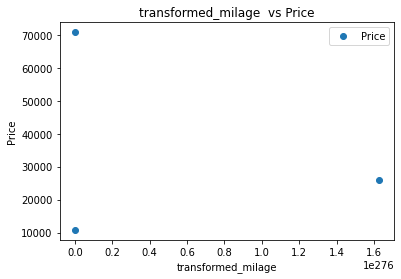

,transformed_milage,Price
transformed_milage,NaN,-0.0
Price,-0.0,1.0


In [ ]:
#exponential transformation
df['transformed_milage'] = np.exp(df['Mileage'])
df.plot(x='transformed_milage', y='Price', style='o')
plt.title('transformed_milage  vs Price')
plt.xlabel('transformed_milage')
plt.ylabel('Price')
plt.show()
df[['transformed_milage','Price']].corr()

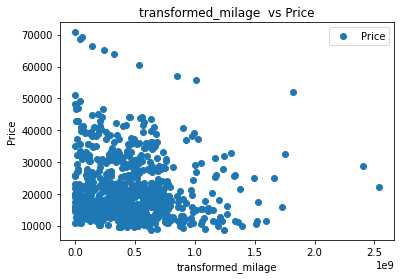

,transformed_milage,Price
transformed_milage,1.000000,-0.117232
Price,-0.117232,1.000000


In [ ]:
#square transformation
df['transformed_milage'] = np.square(df['Mileage'])
df.plot(x='transformed_milage', y='Price', style='o')
plt.title('transformed_milage  vs Price')
plt.xlabel('transformed_milage')
plt.ylabel('Price')
plt.show()
df[['transformed_milage','Price']].corr()

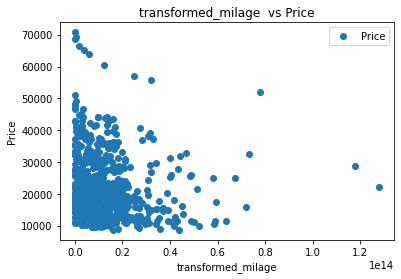

,transformed_milage,Price
transformed_milage,1.000000,-0.085018
Price,-0.085018,1.000000


In [ ]:
#cubic transformation
df['transformed_milage'] = np.power(df['Mileage'],3)
df.plot(x='transformed_milage', y='Price', style='o')
plt.title('transformed_milage  vs Price')
plt.xlabel('transformed_milage')
plt.ylabel('Price')
plt.show()
df[['transformed_milage','Price']].corr()

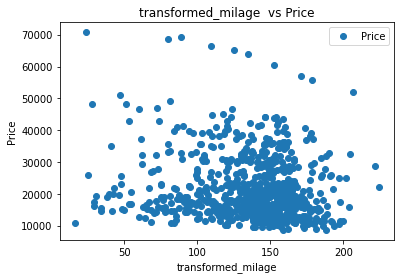

,transformed_milage,Price
transformed_milage,1.000000,-0.149316
Price,-0.149316,1.000000


In [ ]:
#square root tranformation
df['transformed_milage'] = np.sqrt(df['Mileage'])
df.plot(x='transformed_milage', y='Price', style='o')
plt.title('transformed_milage  vs Price')
plt.xlabel('transformed_milage')
plt.ylabel('Price')
plt.show()
df[['transformed_milage','Price']].corr()

**there is no linear relationship between milage and price. since the value of correlation is inbetween (-0.2,0.2) in above all transformation methods. This indicates that milage does not have any linear relation with the price **

The square root transformation give a high correlation compared to other transformation data. Therefore let us consider the equation as 

y=m(x^0.5)+c

where x = milage and y = price.

In [ ]:
X = df.loc[:, ['transformed_milage']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 5)

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.004284498154108807


Poor R2 score since there is no correlation between milage and price

**Tasks, Part 2**

1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

2.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

3.Find the combination of the factors that is the best predictor for price.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("car_data.csv")

In [ ]:
df.shape

(804, 12)

In [ ]:
#Null value analysis
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
#analysing formate or datatype of the data
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
#removing duplicates
df = df.drop_duplicates()
df.shape

(804, 12)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
#Outlier detection
outlier_cols=['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
for col in outlier_cols:
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[col].quantile(0.25) - (1.5 * iqr)
  print("column name:", col)
  print('       upper threshold value:', upper_threshold)
  print('       lower threshold value:', lower_threshold)
  flag=0
  for i in range(1,8):
    if ((df[col].describe()[i]>=lower_threshold) and (df[col].describe()[i]<=upper_threshold)):
      pass
    else:
      flag=1
      break
  if i==1:
    print(col, '=> Outlier Detected')
  else:
    print(col, '=> Outlier Not Detected')

column name: Price
       upper threshold value: 45383.68078365926
       lower threshold value: -4393.290277667038
Price => Outlier Not Detected
column name: Mileage
       upper threshold value: 41097.25
       lower threshold value: -1260.75
Mileage => Outlier Not Detected
column name: Cylinder
       upper threshold value: 9.0
       lower threshold value: 1.0
Cylinder => Outlier Not Detected
column name: Liter
       upper threshold value: 6.199999999999999
       lower threshold value: -0.1999999999999993
Liter => Outlier Not Detected
column name: Doors
       upper threshold value: 4.0
       lower threshold value: 4.0
Doors => Outlier Detected
column name: Cruise
       upper threshold value: 1.0
       lower threshold value: 1.0
Cruise => Outlier Detected
column name: Sound
       upper threshold value: 2.5
       lower threshold value: -1.5
Sound => Outlier Not Detected
column name: Leather
       upper threshold value: 2.5
       lower threshold value: -1.5
Leather => Outlie

In [ ]:
df.Doors = df.Doors.clip(4,4)
df.Cruise = df.Cruise.clip(1,1)

In [ ]:
df = pd.get_dummies(df,columns = ["Make"])
df = pd.get_dummies(df,columns = ["Model"])
df = pd.get_dummies(df,columns = ["Trim"])
df = pd.get_dummies(df,columns = ["Type"])
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


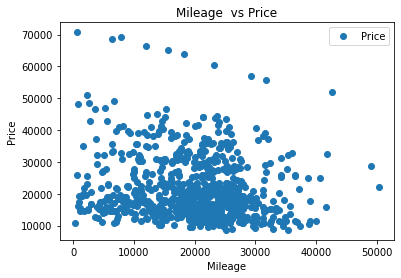

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
#finding correlation among the features and target variable
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage  vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage','Price']].corr()

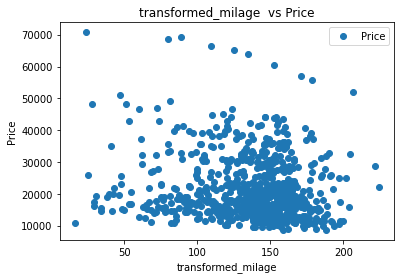

,transformed_milage,Price
transformed_milage,1.000000,-0.149316
Price,-0.149316,1.000000


In [ ]:
#square root tranformation for milage
df['transformed_milage'] = np.sqrt(df['Mileage'])
df.plot(x='transformed_milage', y='Price', style='o')
plt.title('transformed_milage  vs Price')
plt.xlabel('transformed_milage')
plt.ylabel('Price')
plt.show()
df[['transformed_milage','Price']].corr()

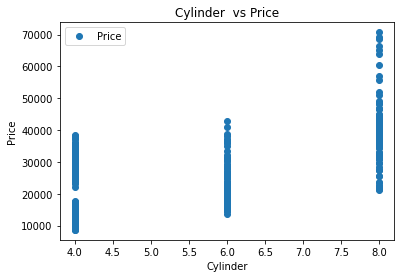

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [ ]:
df.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder  vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()
df[['Cylinder','Price']].corr()

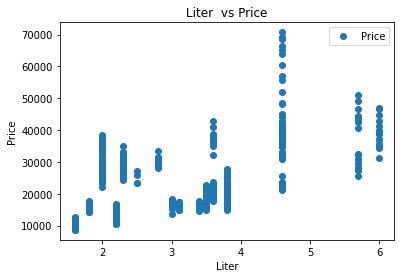

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [ ]:
df.plot(x='Liter', y='Price', style='o')
plt.title('Liter  vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()
df[['Liter','Price']].corr()

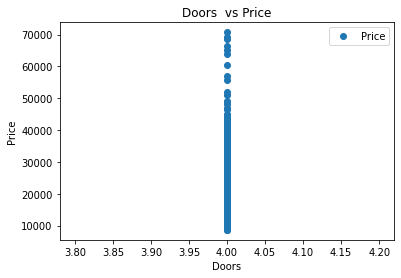

,Doors,Price
Doors,NaN,NaN
Price,NaN,1.0


In [ ]:
df.plot(x='Doors', y='Price', style='o')
plt.title('Doors  vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors','Price']].corr()

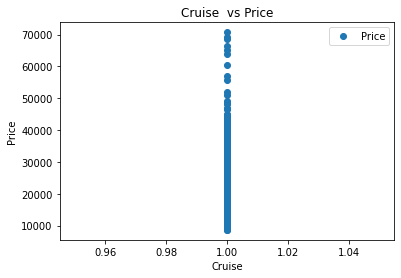

,Cruise,Price
Cruise,NaN,NaN
Price,NaN,1.0


In [ ]:
df.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise  vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()
df[['Cruise','Price']].corr()

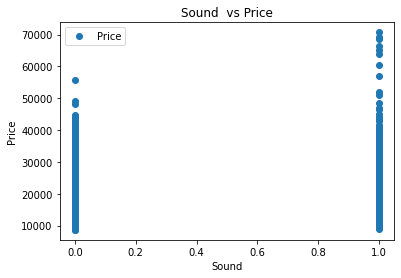

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df.plot(x='Sound', y='Price', style='o')
plt.title('Sound  vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()
df[['Sound','Price']].corr()

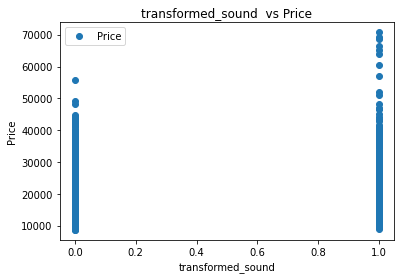

,transformed_sound,Price
transformed_sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
#square root tranformation for sound
df['transformed_sound'] = np.sqrt(df['Sound'])
df.plot(x='transformed_sound', y='Price', style='o')
plt.title('transformed_sound  vs Price')
plt.xlabel('transformed_sound')
plt.ylabel('Price')
plt.show()
df[['transformed_sound','Price']].corr()

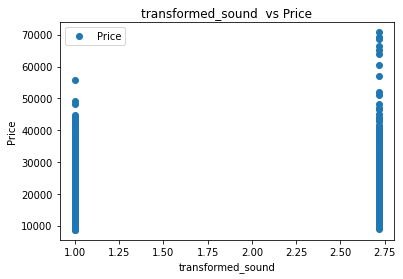

,transformed_sound,Price
transformed_sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
#exponential tranformation for sound
df['transformed_sound'] = np.exp(df['Sound'])
df.plot(x='transformed_sound', y='Price', style='o')
plt.title('transformed_sound  vs Price')
plt.xlabel('transformed_sound')
plt.ylabel('Price')
plt.show()
df[['transformed_sound','Price']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


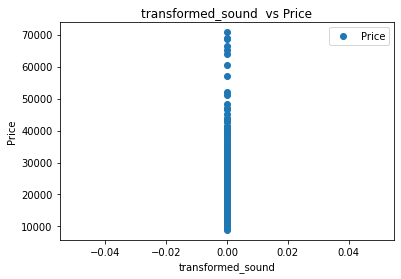

,transformed_sound,Price
transformed_sound,NaN,NaN
Price,NaN,1.0


In [ ]:
#log tranformation for sound
df['transformed_sound'] = np.log(df['Sound'])
df.plot(x='transformed_sound', y='Price', style='o')
plt.title('transformed_sound  vs Price')
plt.xlabel('transformed_sound')
plt.ylabel('Price')
plt.show()
df[['transformed_sound','Price']].corr()

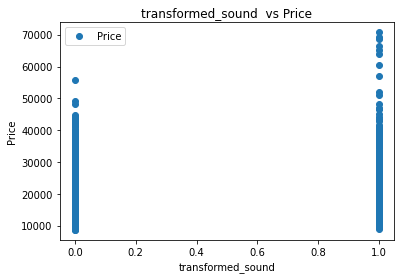

,transformed_sound,Price
transformed_sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
#square tranformation for sound
df['transformed_sound'] = np.square(df['Sound'])
df.plot(x='transformed_sound', y='Price', style='o')
plt.title('transformed_sound  vs Price')
plt.xlabel('transformed_sound')
plt.ylabel('Price')
plt.show()
df[['transformed_sound','Price']].corr()

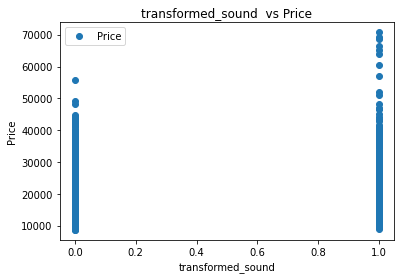

,transformed_sound,Price
transformed_sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
#cubic tranformation for sound
df['transformed_sound'] = np.power(df['Sound'],3)
df.plot(x='transformed_sound', y='Price', style='o')
plt.title('transformed_sound  vs Price')
plt.xlabel('transformed_sound')
plt.ylabel('Price')
plt.show()
df[['transformed_sound','Price']].corr()

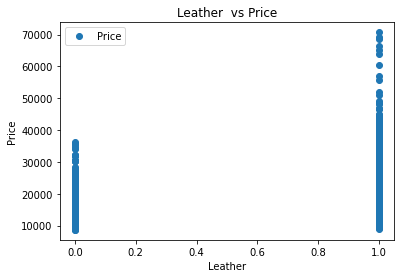

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df.plot(x='Leather', y='Price', style='o')
plt.title('Leather  vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()
df[['Leather','Price']].corr()

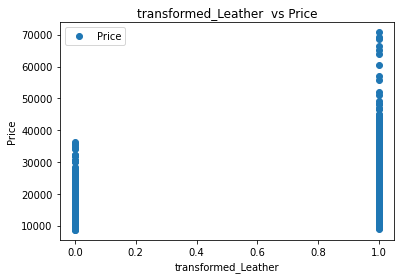

,transformed_Leather,Price
transformed_Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
#cubic tranformation for Leather
df['transformed_Leather'] = np.power(df['Leather'],3)
df.plot(x='transformed_Leather', y='Price', style='o')
plt.title('transformed_Leather  vs Price')
plt.xlabel('transformed_Leather')
plt.ylabel('Price')
plt.show()
df[['transformed_Leather','Price']].corr()

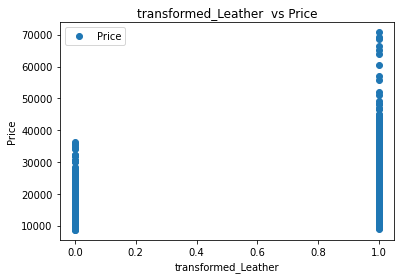

,transformed_Leather,Price
transformed_Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
#square tranformation for Leather
df['transformed_Leather'] = np.square(df['Leather'])
df.plot(x='transformed_Leather', y='Price', style='o')
plt.title('transformed_Leather  vs Price')
plt.xlabel('transformed_Leather')
plt.ylabel('Price')
plt.show()
df[['transformed_Leather','Price']].corr()

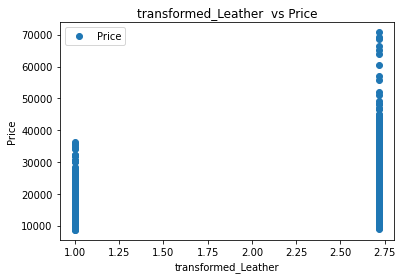

,transformed_Leather,Price
transformed_Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
#exp tranformation for Leather
df['transformed_Leather'] = np.exp(df['Leather'])
df.plot(x='transformed_Leather', y='Price', style='o')
plt.title('transformed_Leather  vs Price')
plt.xlabel('transformed_Leather')
plt.ylabel('Price')
plt.show()
df[['transformed_Leather','Price']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


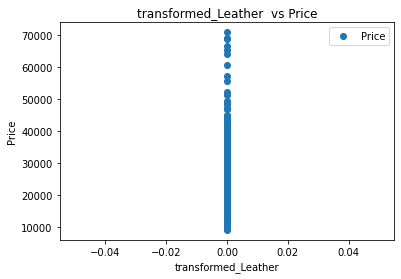

,transformed_Leather,Price
transformed_Leather,NaN,NaN
Price,NaN,1.0


In [ ]:
#log tranformation for Leather
df['transformed_Leather'] = np.log(df['Leather'])
df.plot(x='transformed_Leather', y='Price', style='o')
plt.title('transformed_Leather  vs Price')
plt.xlabel('transformed_Leather')
plt.ylabel('Price')
plt.show()
df[['transformed_Leather','Price']].corr()

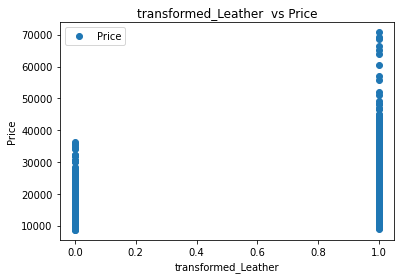

,transformed_Leather,Price
transformed_Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
#square root tranformation for Leather
df['transformed_Leather'] = np.sqrt(df['Leather'])
df.plot(x='transformed_Leather', y='Price', style='o')
plt.title('transformed_Leather  vs Price')
plt.xlabel('transformed_Leather')
plt.ylabel('Price')
plt.show()
df[['transformed_Leather','Price']].corr()

equation formed= 

y=m1(x1^0.5)+m2x2+m3x3+m4x4+m5x5+m6x6+m7x7+c

where,

y='Price'
x1='Mileage'
x2='Cylinder'
x3='Liter'
x4='Doors'
x5='Cruise'
x6='Sound'
x7='Leather'

In [ ]:
X = df.loc[:, ['Cylinder','Liter','Doors','Cruise', 'Sound','Leather','transformed_milage']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 5)

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.42362384442431267


Poor R2 score since there is no correlation between features and target variable

3.finding best combination of features for the above given combination for prediction

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
maxr=0
best_feature=''
mae=0
mse=0
cols=['Cylinder','Liter','Doors','Cruise', 'Sound','Leather','transformed_milage']
for i in range(1,len(cols)+1):
  print(list(combinations(cols,i)))
  a=list(combinations(cols,i))
  for j in range(len(a)):
    print(list(a[j]))
    X = df[list(a[j])].values #array of features
    y = df['Price'].values
    
    #data spliting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

    #Scaling
    scaler = MinMaxScaler() #initialise to a variable
    scaler.fit(X_train) # we are finding the values of mean and sd from the td
    X_train_scaled = scaler.transform(X_train) # transform the training data
    X_test_scaled = scaler.transform(X_test) # transform the test data 

    #Model training
    regressor = LinearRegression()
    regressor.fit(X_train_scaled, y_train)

    #Predicting test data
    y_pred = regressor.predict(X_test_scaled)

    #Loss functions
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

    #getting r2 score value
    r2=metrics.r2_score(y_test,y_pred)
    print('R2- SCORE:', r2)

    #cross validation score
    regressor = LinearRegression(normalize = True)
    cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
    print('CROSS VALIDATION SCORE:', cv_results['test_score'].mean())

    if r2>maxr:
      maxr=r2
      best_feature=list(a[j])
      mae=metrics.mean_absolute_error(y_test, y_pred)
      mse=metrics.mean_squared_error(y_test, y_pred)

print("Best R2 score is ", maxr)
print('Best feature for the corresponding R2 value is ', best_feature)
print('Mean Absolute Error for above feature is:', mae)
print('Mean Squared Error for above feature is:', mse)

[('Cylinder',), ('Liter',), ('Doors',), ('Cruise',), ('Sound',), ('Leather',), ('transformed_milage',)]
['Cylinder']
Mean Absolute Error: 6665.491772782803
Mean Squared Error: 69070392.37684274
R2- SCORE: 0.3420165142157533
CROSS VALIDATION SCORE: -6.663518433125972
['Liter']
Mean Absolute Error: 6740.531173214397
Mean Squared Error: 69660398.29391532
R2- SCORE: 0.3363959561649075
CROSS VALIDATION SCORE: -5.999318333546526
['Doors']
Mean Absolute Error: 7878.9878860485005
Mean Squared Error: 106161077.0488673
R2- SCORE: -0.01131951227546657
CROSS VALIDATION SCORE: -13.84298015993204
['Cruise']
Mean Absolute Error: 7878.9878860485005
Mean Squared Error: 106161077.0488673
R2- SCORE: -0.01131951227546657
CROSS VALIDATION SCORE: -13.84298015993204
['Sound']
Mean Absolute Error: 7750.522259024516
Mean Squared Error: 103681546.49389148
R2- SCORE: 0.012301175280067467
CROSS VALIDATION SCORE: -13.264773365427516
['Leather']
Mean Absolute Error: 7804.422662408548
Mean Squared Error: 102267110.8

**Tasks, Hard Mode**

1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.[done already in before task]

2.Find the best combination of factors to predict price.

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
maxr=0
best_feature=''
mae=0
mse=0
dfT=df.drop(['Price'], axis = 1)
for i in range(1,len(dfT.columns)+1):
  print(list(combinations(dfT.columns[:-1],i)))
  a=list(combinations(dfT.columns[:-1],i))
  for j in range(len(a)):
    print(list(a[j]))
    X = df[list(a[j])].values #array of features
    y = df['Price'].values
    
    #data spliting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #Scaling
    scaler = MinMaxScaler() #initialise to a variable
    scaler.fit(X_train) # we are finding the values of mean and sd from the td
    X_train_scaled = scaler.transform(X_train) # transform the training data
    X_test_scaled = scaler.transform(X_test) # transform the test data 

    #Model training
    regressor = LinearRegression()
    regressor.fit(X_train_scaled, y_train)

    #Predicting test data
    y_pred = regressor.predict(X_test_scaled)

    #Loss functions
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

    #getting r2 score value
    r2=metrics.r2_score(y_test,y_pred)
    print('R2- SCORE:', r2)

    #cross validation score
    regressor = LinearRegression(normalize = True)
    cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
    print('CROSS VALIDATION SCORE:', cv_results['test_score'].mean())

    if r2>maxr:
      maxr=r2
      best_feature=list(a[j])
      mae=metrics.mean_absolute_error(y_test, y_pred)
      mse=metrics.mean_squared_error(y_test, y_pred)
print("Best R2 score is ", maxr)
print('Best feature for the corresponding R2 value is ', best_feature)
print('Mean Absolute Error for above feature is:', mae)
print('Mean Squared Error for above feature is:', mse)

Streaming output truncated to the last 5000 lines.
Mean Absolute Error: 7516.388222786777
Mean Squared Error: 80507530.96454097
R2- SCORE: -0.004704965600818456
CROSS VALIDATION SCORE: -13.905829137904524
['Trim_CXL Sedan 4D', 'Trim_SS Sedan 4D']
Mean Absolute Error: 8047.648605031094
Mean Squared Error: 108301502.3415133
R2- SCORE: -0.010208970970533526
CROSS VALIDATION SCORE: -13.827078751655268
['Trim_CXL Sedan 4D', 'Trim_SVM Hatchback 4D']
Mean Absolute Error: 7350.535850251166
Mean Squared Error: 93402937.82137495
R2- SCORE: 0.014098813244316832
CROSS VALIDATION SCORE: -14.092333088253557
['Trim_CXL Sedan 4D', 'Trim_SVM Sedan 4D']
Mean Absolute Error: 7554.306361506867
Mean Squared Error: 99345180.73469484
R2- SCORE: 0.013182697559948275
CROSS VALIDATION SCORE: -14.10486944397395
['Trim_CXL Sedan 4D', 'Trim_Sedan 4D']
Mean Absolute Error: 7655.905934255423
Mean Squared Error: 98837571.16517624
R2- SCORE: -0.0019901907824204645
CROSS VALIDATION SCORE: -14.334891701549324
['Trim_CXL

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
['Trim_Linear Sedan 4D', 'Trim_Special Ed Ultra 4D', 'Type_Wagon']
Mean Absolute Error: 8136.295988131864
Mean Squared Error: 134383043.56478235
R2- SCORE: -0.003883180885203119
CROSS VALIDATION SCORE: -13.620468806553934
['Trim_Linear Sedan 4D', 'Trim_Special Ed Ultra 4D', 'transformed_milage']
Mean Absolute Error: 7666.281186426287
Mean Squared Error: 101890303.13375969
R2- SCORE: -0.0010085042083991524
CROSS VALIDATION SCORE: -13.519014726926823
['Trim_Linear Sedan 4D', 'Trim_Special Ed Ultra 4D', 'transformed_sound']
Mean Absolute Error: 7859.385967302744
Mean Squared Error: 100285440.53079797
R2- SCORE: 0.030560204200303587
CROSS VALIDATION SCORE: -13.097488917802021
['Trim_Linear Sedan 4D', 'Trim_Sportwagon 4D', 'Type_Convertible']
Mean Absolute Error: 6358.656339615871
Mean Squared Error: 69400327.89914992
R2- SCORE: 0.25707249419609424
CROSS VALIDATION SCORE: -10.353267091975237
['Trim_Linear Sedan 4D', 'Trim_Sportwagon 4D', 'T

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Mean Absolute Error: 6433.295062511988
Mean Squared Error: 65237522.36686446
R2- SCORE: 0.3084976087213346
CROSS VALIDATION SCORE: -9.865844080498922
['Mileage', 'Cruise', 'Trim_LT Sedan 4D', 'Type_Coupe']
Mean Absolute Error: 7810.7780724396025
Mean Squared Error: 105215868.42516029
R2- SCORE: 0.06946635049469718
CROSS VALIDATION SCORE: -12.306681651606562
['Mileage', 'Cruise', 'Trim_LT Sedan 4D', 'Type_Hatchback']
Mean Absolute Error: 7377.151911421373
Mean Squared Error: 91974696.31542492
R2- SCORE: 0.08279833757282273
CROSS VALIDATION SCORE: -12.440040065570965
['Mileage', 'Cruise', 'Trim_LT Sedan 4D', 'Type_Sedan']
Mean Absolute Error: 7417.332065548074
Mean Squared Error: 77718864.66729966
R2- SCORE: -0.0013884692688210798
CROSS VALIDATION SCORE: -13.890618750013328
['Mileage', 'Cruise', 'Trim_LT Sedan 4D', 'Type_Wagon']
Mean Absolute Error: 8663.336519769417
Mean Squared Error: 145950910.21866873
R2- SCORE: 0.03242126891203634
C

KeyboardInterrupt: ignored